In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset (replace with your actual file path)
df = pd.read_excel("C:\\Users\\mukil\\OneDrive - University of Southampton\\GDP - COMP6200\\CVD's Dataset.xlsx")

# Step 1: Handling Missing Values
# Impute missing values for numeric columns with mean and categorical columns with mode
numeric_columns = ['cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate']
categorical_columns = ['education']

imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

df[numeric_columns] = imputer_num.fit_transform(df[numeric_columns])
df[categorical_columns] = imputer_cat.fit_transform(df[categorical_columns])

# Step 2: Encoding Categorical Variables (Binary variables)
binary_columns = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
label_encoder = LabelEncoder()
df[binary_columns] = df[binary_columns].apply(label_encoder.fit_transform)

# Step 3: Feature Scaling (Standardizing numeric features)
scaler = StandardScaler()
scaled_columns = ['sysBP', 'diaBP', 'BMI', 'heartRate']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# Step 4: Splitting the Dataset into Features (X) and Target (y)
X = df.drop(columns=['TenYearCHD'])  # Features
y = df['TenYearCHD']  # Target

# Step 5: Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (3392, 13)
Test set shape: (848, 13)


In [2]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample CVD cases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train-test split after resampling
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



Training and evaluating Random Forest...

Results for Random Forest:
Accuracy: 0.7877
ROC AUC: 0.6360
Cross-validation Score: 0.8574 (+/- 0.0074)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       725
           1       0.26      0.24      0.25       123

    accuracy                           0.79       848
   macro avg       0.56      0.56      0.56       848
weighted avg       0.78      0.79      0.79       848



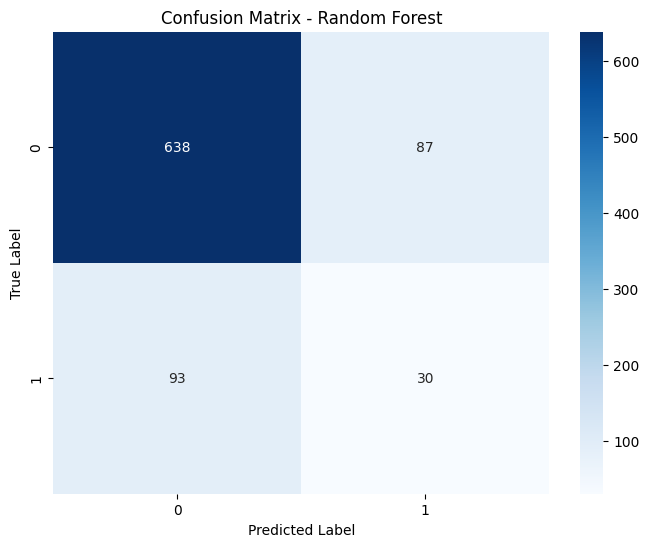

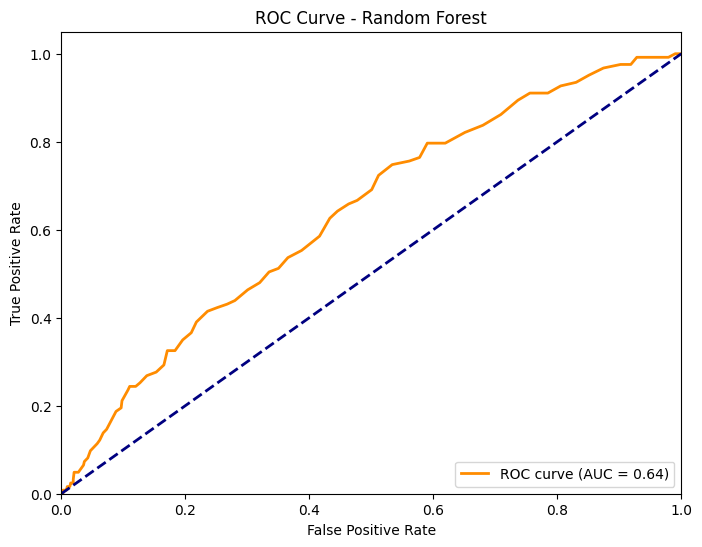


Training and evaluating XGBoost...

Results for XGBoost:
Accuracy: 0.7866
ROC AUC: 0.6425
Cross-validation Score: 0.8683 (+/- 0.0144)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       725
           1       0.25      0.23      0.24       123

    accuracy                           0.79       848
   macro avg       0.56      0.55      0.56       848
weighted avg       0.78      0.79      0.78       848



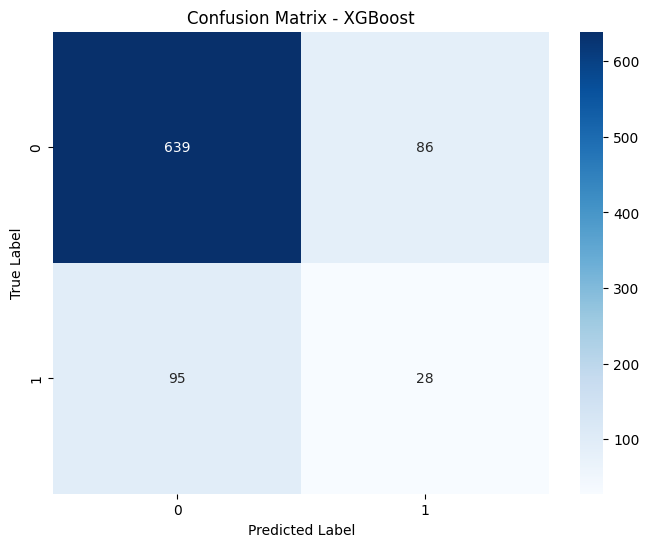

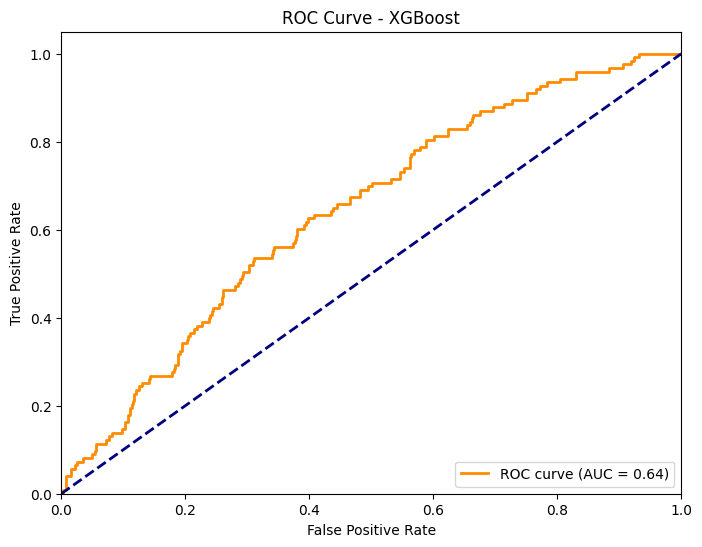


Training and evaluating Gradient Boosting...

Results for Gradient Boosting:
Accuracy: 0.7370
ROC AUC: 0.6473
Cross-validation Score: 0.8106 (+/- 0.0214)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       725
           1       0.21      0.28      0.24       123

    accuracy                           0.74       848
   macro avg       0.54      0.55      0.54       848
weighted avg       0.77      0.74      0.75       848



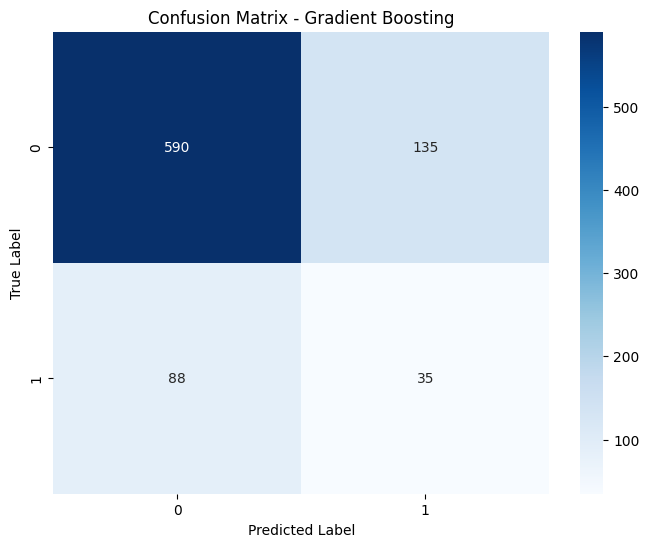

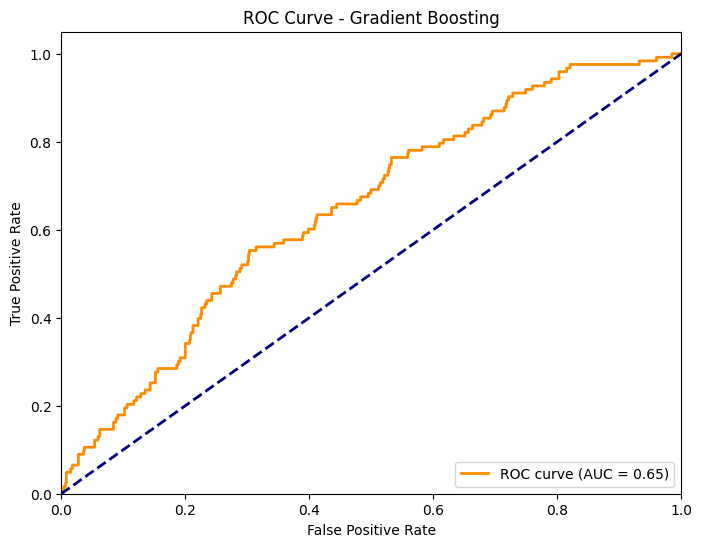


Training and evaluating SVM...

Results for SVM:
Accuracy: 0.6215
ROC AUC: 0.6787
Cross-validation Score: 0.6532 (+/- 0.0188)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.61      0.73       725
           1       0.23      0.71      0.35       123

    accuracy                           0.62       848
   macro avg       0.58      0.66      0.54       848
weighted avg       0.82      0.62      0.68       848



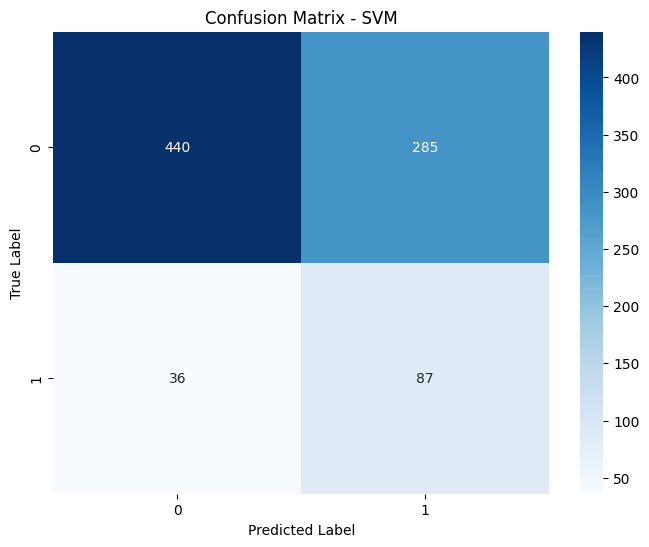

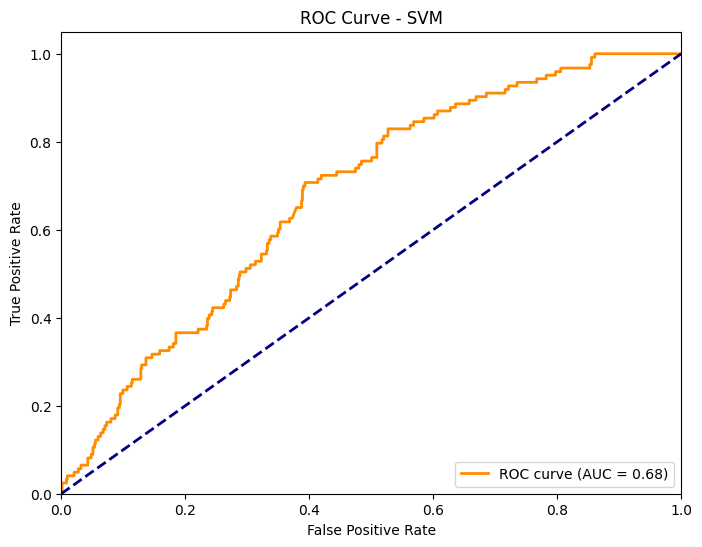

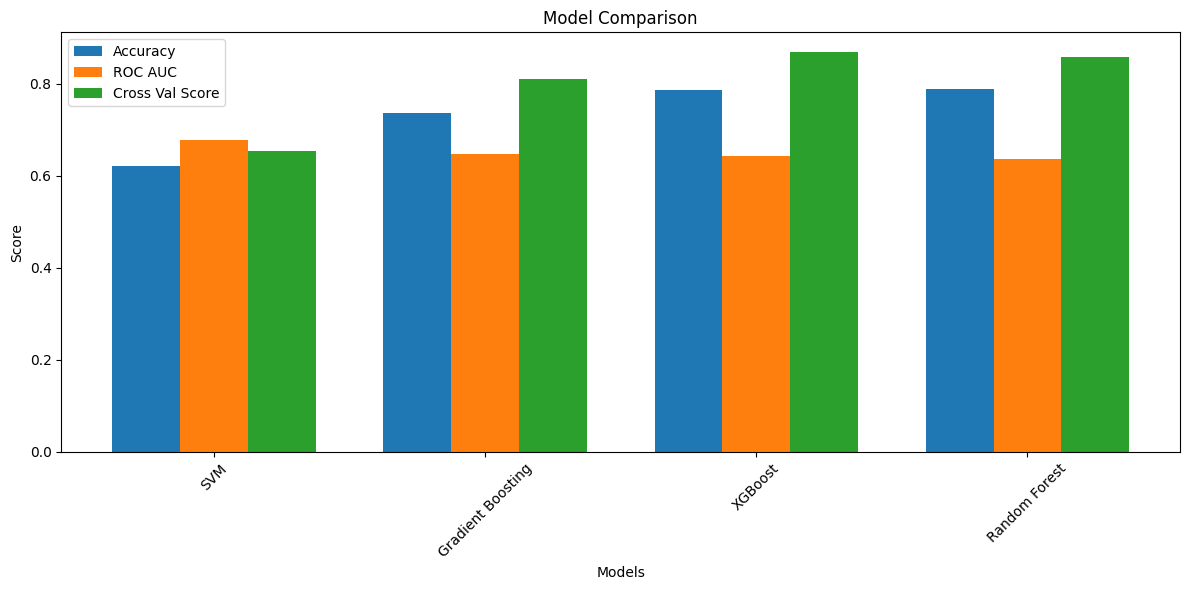


Final Model Comparison:
            Model  Accuracy  ROC AUC  Cross Val Score
              SVM  0.621462 0.678727         0.653170
Gradient Boosting  0.737028 0.647340         0.810583
          XGBoost  0.786557 0.642489         0.868277
    Random Forest  0.787736 0.635991         0.857390


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)


# Create a dictionary of models to test
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'ROC AUC': [],
    'Cross Val Score': []
}

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend(loc="lower right")
    plt.show()
    
    return roc_auc

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")
    
    # Train the model
    model.fit(X_train_smote, y_train_smote)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5)
    
    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['ROC AUC'].append(roc_auc)
    results['Cross Val Score'].append(cv_scores.mean())
    
    # Print detailed results
    print(f"\nResults for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Cross-validation Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix and ROC curve
    plot_confusion_matrix(y_test, y_pred, name)
    plot_roc_curve(y_test, y_pred_proba, name)

# Create comparison DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('ROC AUC', ascending=False)

# Plot model comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(results_df))
width = 0.25

plt.bar(x - width, results_df['Accuracy'], width, label='Accuracy')
plt.bar(x, results_df['ROC AUC'], width, label='ROC AUC')
plt.bar(x + width, results_df['Cross Val Score'], width, label='Cross Val Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(x, results_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Print final comparison table
print("\nFinal Model Comparison:")
print(results_df.to_string(index=False))